# Python Primer Part II Exercises (with Solutions)

## Lesson 5: Conditionals

### Exercise:

Write a Python program to convert temperatures to and from celsius, fahrenheit.

Formula : c/5 = f-32/9 (where c = temperature in celsius and f = temperature in fahrenheit )

Expected Output : 

60°C is 140 in Fahrenheit

45°F is 7 in Celsius 

In [1]:
# gather input from the user
temp = input("Input the  temperature you like to convert? (e.g., 45F, 102C etc.) : ")

# parse the string of input from the user
degree = int(temp[:-1])
i_convention = temp[-1]

if i_convention.upper() == 'F':
  result = int(round((9 * degree) / 5 + 32))
  o_convention = "Fahrenheit"
elif i_convention.upper() == 'C':
  result = int(round((degree - 32) * 5 / 9))
  o_convention = "Celsius"
else:
  print("Input proper convention.")
  quit()
print("The temperature in", o_convention, "is", result, "degrees.")


Input the  temperature you like to convert? (e.g., 45F, 102C etc.) : 100C
The temperature in Celsius is 38 degrees.


### Exercise:

Who discovered your favorite elements?

Let's write a simple test to see which elements were discovered by discoverer A, discoverer B, and both!

In [2]:
import os
from monty.serialization import loadfn

In [3]:
data_dir = "./data/"

# Dictionary of elements, with those who discovered them 
# and the year they were discovered 
# (sources: https://en.wikipedia.org/wiki/Timeline_of_chemical_element_discoveries,
#  https://education.jlab.org/qa/discover_ele.html)
discovery_dict = loadfn(os.path.join(data_dir, "discoveries.json"))

In [4]:
from pymatgen.core import Element

In [5]:
# The discoverers we want to explore...
discover0 = "Berkeley"
#discover0 = "Ghiorso"

discover1 = "Russia"

# Loop through discoverers to find which elements they discovered
for element_name in discovery_dict:
    
    names = discovery_dict[element_name]['discovered_by']
    
    A, B = False, False
    for name in names:
        if discover0 in name:
            A = True
        if discover1 in name:
            B = True

    if A and B:
        print("For ", element_name, ", A and B is true!")
    elif A:
        print("For ", element_name, ", A is true!")
    elif B:
        print("For ", element_name, ", B is true!")

For  Bohrium , B is true!
For  Dubnium , A and B is true!
For  Flerovium , B is true!
For  Livermorium , B is true!
For  Rutherfordium , B is true!


## Lesson 6: Sets and Dictionaries

### Exercise: create a histogram

In [6]:
numbers = [1, 0, 1, 2, 0, 0, 1, 2, 1, 3, 1, 0, 2]
count = {}
for n in numbers:
    if n not in count:
        count[n] = 1
    else:
        count[n] = count[n] + 1
print(count)

{1: 5, 0: 4, 2: 3, 3: 1}


Reminder: there are lots of useful Python libraries, especially the "standard library" that comes with Python:

In [7]:
from collections import Counter

print(Counter(numbers))
print(dict(Counter(numbers)))

Counter({1: 5, 0: 4, 2: 3, 3: 1})
{1: 5, 0: 4, 2: 3, 3: 1}


### Exercise: How heavy is this molecule?
You are given two things:

1. a dictionary mapping atomic symbols to atomic weights (`mp_workshop.data.atomic_weights`), and
2. a list of (atomic_symbol, count) pairs for a molecule.

```python
# Example molecules:
methane = [('C', 1), ('H', 4)]
aminothiazole = [('C', 3), ('H', 4), ('N', 2), ('S', 1)]
```

Print that molecule's molecular weight.


In [8]:
import os
from monty.serialization import loadfn

data_dir = "./data/"
atomic_weights = loadfn(os.path.join(data_dir, "atomic_weights.json"))

# atomic weight is 16.0423
methane = [('C', 1), ('H', 4)]
# atomic weight is 100.1421
aminothiazole = [('C', 3), ('H', 4), ('N', 2), ('S', 1)]

# 2. Pick a molecule to test
molecule = methane

# 3. Do stuff to calculate `mol_weight`

mol_weight = 0.0
for specie, number in methane:
    mol_weight += number * atomic_weights[specie]

print(mol_weight)


16.04246


## Lesson 7: Writing Functions

### Exercise: Find the first
Fill in the blanks to create a function that takes a list of numbers as an argument and returns the first negative value in the list. What does your function do if the list is empty?

In [9]:
def first_negative(values):
    for v in values:
        if v < 0:
            return v

### Exercise : Running sum
Write a function that calculates the running sum of any number of input arguments, returning the result as a list. For example:

* running(1, 2) => [1, 3]
* running(-5, 2, 7) => [-5, -3, 4]

What should running() return, and why?

### Exercise: How's your phase-change memory?
A chalcogenide is a chemical compound consisting of at least one chalcogen anion (commonly restricted to ‘S’, ‘Se’, or ‘Te’) and at least one more electropositive element. Generalize the `halide` function below as `compound_class`, a function that takes a crystal and function as parameters and returns whether or not the compound is of that class.

In [10]:
# %load code/phase_change_memory.py
import random

from pymatgen import Element

import os
from monty.serialization import loadfn

data_dir = "./data/"
crystals = loadfn(os.path.join(data_dir, "crystals.json"))


def halogen(element):
    return element.is_halogen


def halide(crystal):
    elts = [Element(s) for s in crystal['elements']]
    anion = sorted(elts)[-1] # sorts by electronegativity
    return halogen(anion)


def chalcogen(element):
    return element.is_chalogen


def compound_class(crystal, predicate):
    elts = [Element(s) for s in crystal['elements']]
    anion = sorted(elts)[-1] # sorts by electronegativity
    return predicate(anion)

my_crystal = random.sample(
    [c for c in crystals if halide(c)], 1)[0]

print(compound_class(my_crystal, halogen)
      == halide(my_crystal))

True


# Lesson 8: Test your Skills

## Now it's time to put your skills to the test!
* Exercise: As a materials investigator, your team has just finished running calculations for a large number of crystal structures. Now, you want to analyze the dataset by writing __functions__ that utilize logic (in the form of __conditionals__) to parse through the datasets in the forms of __dictionaries__ and __lists__.

First, load the relevant datasets

In [11]:
import os
from monty.serialization import loadfn

data_dir = "./data/"

# Our crystal structures, in addition to useful elemental information
crystals = loadfn(os.path.join(data_dir, "crystals.json"))
atomic_numbers = loadfn(os.path.join(data_dir, "atomic_numbers.json"))
atomic_weights = loadfn(os.path.join(data_dir, "atomic_weights.json"))

# Names of elements associated with an element symbol (e.g. {"Al": "Aluminium"})
element_names = loadfn(os.path.join(data_dir, "element_names.json"))

# Elemental mass fraction of Earth's crust (source: https://en.wikipedia.org/wiki/Abundances_of_the_elements_(data_page))
mass_frac_earth_crust = loadfn(os.path.join(data_dir, "mass_frac_earth_crust.json"))

# Dictionary of elements, with those who discovered them 
# and the year they were discovered 
# (sources: https://en.wikipedia.org/wiki/Timeline_of_chemical_element_discoveries,
#  https://education.jlab.org/qa/discover_ele.html)
discovery_dict = loadfn(os.path.join(data_dir, "discoveries.json"))

We have the mapping from `symbol` $\rightarrow$ `name`, now let's obtain `name` $\rightarrow$ `symbol` (we'll need it later)

In [12]:
print(element_names["Ag"])

element_symbols = {v: k for k, v in element_names.items()}

print(element_symbols["Silver"])

Silver
Ag


Next, we'll choose the set of elements that we would like to start with. Each element has a unique story associated with it. We can explore these stories with the information from the element discovery timeline.

__Our task:__ Build a function that takes a list of element symbols as input. In addition, if we want to add the elements associated with a particular materials discoverer, we can include some _regex_ (or "regular expression") strings corresponding to the discoverers we would like to feature.

In [13]:
from pymatgen.core import Element, Composition

In [14]:
def my_element_discoverer(elements:list=[], discoverers:list=[], prior_to:int=2020):
    
    # Start with elements provided by user 
    # (use copy() to not modify list passed to function)
    all_elements = elements.copy()
    
    # Loop through discoverers to find which elements they discovered
    # and then add them to your list
    for discoverer in discoverers:
        for element_name in discovery_dict:
            
            for name in discovery_dict[element_name]['discovered_by']:
                if discoverer in name:
                    elem = Element(element_symbols[element_name])
                    all_elements.append(elem)
    
    # Create a new list that will contain only the elements discovered 
    # before the year you provide
    elements_pruned = []
    
    for elem in all_elements:
        element_name = element_names[str(elem)]
        if discovery_dict[element_name]['year'] != '?':
            year_discovered = int(discovery_dict[element_name]['year'])
        else:
            # Unknown discovery date (known since ancient times)  
            year_discovered = -2000
            
        if year_discovered < prior_to:
            elem = Element(elem)
            elements_pruned.append(elem)
    
    all_elements = elements_pruned
    
    # Use set() to convert your list into a unique set
    # then recast as a list()
    all_elements = list(set(all_elements))
    
    return all_elements


Let's test out our function! Say we want to use oxygen in addition to elements discovered by scientists with Curie in their name (Marie and Pierre), as well as elements discovered by scientists in Berkeley

In [15]:
my_elements = my_element_discoverer(elements=["O"], 
                                    discoverers=["Curie", "Lawrence Berkeley"], 
                                    prior_to=2020)
print(my_elements)

[Element O, Element Db, Element Ra, Element Po]


Can you spot which elements are missing?

(Hint below)

In [16]:
# Discovered by scientists at UC Berkeley
my_elements = my_element_discoverer(discoverers=["Ghiorso"], 
                                    prior_to=2020)
print(my_elements)

[Element Cm, Element Bk, Element Cf, Element Es, Element Fm, Element Md, Element No, Element Lr, Element Rf, Element Sg, Element Am]


Platinum was found in gold alloys in present day Columbia dating as far back as 800 BC

In [17]:
my_elements = my_element_discoverer(elements=["Ni"], 
                                    discoverers=["Indigenous People of South America"], 
                                    prior_to=1800)
print(my_elements)

[Element Ni, Element Pt]


Next, our goal is to find all of the crystals that contain the elements in our list. 

Once we obtain this list, it is often useful to sort these materials based on a particular metric, depending on which properties that we would like to assess. The two criteria we will use in this study are the molar mass and abundance:

* Molar mass = $\sum_{i=1}^N x_i n_i$, where $n_i$ is the elemental molar mass, and $x_i$ is the molar fraction
* Abundance metric = $\prod_{i=1}^N a_i^{y_i}$, where $a_i$ is the mass abundance of the element $i$, and $y_i$ is the mass fraction in the material

In [18]:
import numpy as np

In [19]:
def compute_molar_weight(crystal):
    # Obtain atomic fractions of material
    comp = Composition(crystal["pretty_formula"])                                                                                          
    atomic_fractions = [comp.get_atomic_fraction(Element(elem)) for elem in crystal['elements']]
    
    # Obtain atomic weights of elements in material
    weights = [atomic_weights[elem] for elem in crystal['elements']]
    
    # Compute molar weight of material (weighted mean)
    molar_weight = 0.0
    for elem,frac,weight in zip(crystal["elements"], atomic_fractions, weights):
        molar_weight += frac*weight
    
    return molar_weight

def compute_abundance_metric(crystal):
    # Obtain mass fractions of material
    comp = Composition(crystal["pretty_formula"])                                                                                          
    molar_weight = compute_molar_weight(crystal)
    mass_fractions = [comp.get_atomic_fraction(Element(elem))*(atomic_weights[elem]/molar_weight) 
                      for elem in crystal['elements']]
    
    # Obtain atomic abundances of elements in material
    abundances = [mass_frac_earth_crust[elem] for elem in crystal['elements']]
    
    # Compute abundance metric (geometric mean)
    abundance_metric = 1.0
    for elem,frac,abundance in zip(crystal["elements"], mass_fractions, abundances):
        abundance_metric *= (100*abundance)**frac
    
    return abundance_metric

In [20]:
crystal = crystals[0]
print("Material:", crystal["pretty_formula"])
print("Molar weight (g / mol / # atoms per formula unit) = ", compute_molar_weight(crystal))
print("Abundance metric (% kg/kg) = ", compute_abundance_metric(crystal))

Material: Ca3Ge3(MoO6)2
Molar weight (g / mol / # atoms per formula unit) =  36.10134
Abundance metric (% kg/kg) =  0.022347289066530374


Now that we have our sorting metrics, let's find the materials in our dataset that contain the elements we have provided, and sort them based on the criteria above.

A helpful relation: For finite sets $A$ and $B$, $B \subseteq A$ if and only if $B = A \cap B$

In [21]:
def get_crystals_from_elements(elements:list, crystals:list, sort_scheme:int=0):
    
    crystals_matched = []
    for crystal in crystals:
        
        crystal_elems = [Element(elem) for elem in crystal['elements']]
        
        # We can check if the material contains the elements that we have provided 
        # (set B in A) by checking if B = intersection(A,B)
        intersection = set(elements) & set(crystal_elems)
        if set(elements) == intersection:
            crystals_matched.append(crystal)
        
    if sort_scheme == 0:
        # Sort by molar weight
        sort_key = "Molar weight (g / mol / # atoms per formula unit)"
        sortable_values = [compute_molar_weight(crystal) for crystal in crystals_matched]
    elif sort_scheme == 1:
        # Sort by abundance metric
        sort_key = "Abundance metric (% kg/kg)"
        sortable_values = [compute_abundance_metric(crystal) for crystal in crystals_matched]
    else:
        # Catch all case - no sorting provided
        sortable_values = []
        print("Warning: Invalid sort scheme!")
        return [], [], ""
    
    if sortable_values:
        #print(sortable_values)
        
        # Sort crystals based on sorting metric (reverse to descending order)
        value_map = [{"value":v, "crystal":c} for v,c in zip(sortable_values, crystals_matched)]
        value_map = sorted(value_map, key=lambda x: x["value"], reverse=True)        
        #sortable_values, crystals_matched = zip(*sorted(zip(sortable_values, crystals_matched), reverse=True))
        
        # Extract desired values after sorting
        sortable_values = [x['value'] for x in value_map]
        crystals_matched = [x['crystal'] for x in value_map]
        
        #print(sortable_values)
        
    return crystals_matched, sortable_values, sort_key

We've built our functions! Now let's test them to search the materials in our dataset

In [22]:
# The elements we would like to search our dataset
elements = [Element(elem) for elem in ['Ca', 'O']]

# Testing our function
crystals_matched, sorted_values, sort_key = get_crystals_from_elements(elements, crystals, 
                                                                       sort_scheme=0)

# The formulas of the crystals that we searched for
formulas = [crystal['pretty_formula'] for crystal in crystals_matched]

print("Number of crystals found: ", len(crystals_matched))
# print(formulas)

Number of crystals found:  445


For a large number of materials, we often gain the most information by perfoming an analysis of how the sorting criteria is distributed. In this case, we can create a histogram of the data using the `matplotlib` package. 

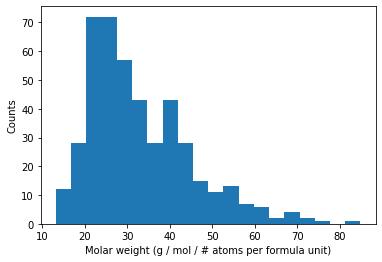

In [24]:
import matplotlib.pyplot as plt

number_of_bins = 20
plt.hist(sorted_values, number_of_bins)
plt.ylabel('Counts')
plt.xlabel(sort_key)
plt.show()